![image.png](https://i.imgur.com/a3uAqnb.png)

In [2]:
from IPython.display import clear_output

# **Download and Hnadle Dataset**

## **Sign Langauge Problem:**

 Intution: The AI is so powrful and important because of its various applications on most if not all the different fields. As a result, we want to help in solving the issue of not understanding sign languages.


This notebook contains a detailed implementaiton of a NN uisng Pytorch.

### 1. **Data set Details:**

- The provided data set is ArASL (Arabic Alphabets Sign Language Dataset). It is as its name says, an arabic sighn langauge for Arabic alphabet. It has a total of 54049 images and their corrssponding labels.

### 2. S**ize of data:**
- Length of train_dataset is 43239,
- Length of val_dataset is 10810

### 3. **Labels representations:**
- Each sample has a label, which can be one of the 32 classes.
It consist of 32 classes for the alphabet.
- The classes values are integers from 0 up to 31.


### 4. **The mapping details:**

- Each number represents a charcter. You can see the dictionary in the variable "mapping".

<br/>
-- You can see the mapping in the following:

0: 'seen', 1: 'zay', 2: 'aleff', 3: 'dal', 4: 'ta', 5: 'yaa', 6: 'fa', 7: 'ya', 8: 'khaa', 9: 'nun', 10: 'ha', 11: 'toot', 12: 'taa', 13: 'ra', 14: 'kaaf', 15: 'jeem', 16: 'laam', 17: 'la', 18: 'dhad', 19: 'dha', 20: 'waw', 21: 'meem', 22: 'al', 23: 'sheen', 24: 'haa', 25: 'thaa', 26: 'saad', 27: 'ghain', 28: 'ain', 29: 'thal', 30: 'gaaf', 31: 'bb'

### 5. **Refrence:**
Latif, G., Mohammad, N., Alghazo, J., AlKhalaf, R., & AlKhalaf, R. (2019). ARASL: Arabic Alphabets Sign Language Dataset. *Data in Brief*, 23, 103777. https://doi.org/10.1016/j.dib.2019.103777

In [ ]:
https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/y7pckrw6z2-1.zip

In [3]:
!wget -O arasl_dataset.zip "https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/y7pckrw6z2-1.zip"
clear_output()

In [4]:
!unzip -q /content/arasl_dataset.zip -d /content/arasl_dataset

In [5]:
!unzip -q /content/arasl_dataset/ArASL_Database_54K_Final.zip -d /content

## 1- Extract the images paths and labels from the dataset folder

In [8]:
from PIL import Image
import torch
from torchvision import transforms
import numpy as np
from torch.utils.data import Dataset, DataLoader, random_split
import os

In [6]:
imgs_path = "/content/ArASL_Database_54K_Final"

In [9]:

image_files = []
image_labels = []

for root, dirs, files in os.walk(imgs_path):
  for file in files:
      if file.lower().endswith('.jpg'):
          image_files.append(os.path.join(root, file))#/content/ArASL_Database_54K_Final/ain/AIN (1).JPG
          image_labels.append(os.path.basename(root))

In [10]:
len(image_files), len(image_labels)

(54049, 54049)

In [13]:
image_labels[0]

'khaa'

In [14]:
LABELS = set(image_labels)

In [16]:
len(LABELS)

32

In [17]:
n_classes = len(LABELS)
n_classes

32

In [18]:
LABELS2INDX = {label: indx for indx, label in enumerate(LABELS)}
INDX2LABELS = {indx: label for label, indx in LABELS2INDX.items()}
lables = [LABELS2INDX[label ] for label in image_labels]

In [19]:
image_files[0], lables[0]

('/content/ArASL_Database_54K_Final/khaa/KHAA (490).jpg', 19)

In [20]:
images = []

In [21]:
for img_path in image_files:
  with Image.open(img_path) as img:
    img = img.convert('L')
    img = img.resize((48,48))
    img = np.array(img)
    img = transforms.ToTensor()(img)
    images.append(img)

In [22]:
images[0].shape

torch.Size([1, 48, 48])

In [29]:
import json
class CustomDataset(Dataset):

    def __init__(self, root_dir, feature_transform=None):
        self.root_dir = root_dir
        self.feature_transform = feature_transform

        self.image_files = []
        self.image_labels = []

        for root, dirs, files in os.walk(self.root_dir):
            for file in files:
                if file.lower().endswith('.jpg'):
                    self.image_files.append(os.path.join(root, file))
                    self.image_labels.append(os.path.basename(root))

        self.LABELS2INDX = {label: indx for indx, label in enumerate(sorted(set(self.image_labels)))}
        self.INDX2LABELS = {indx: label for label, indx in self.LABELS2INDX.items()}
        self.labels = [self.LABELS2INDX[label] for label in self.image_labels]

        label_mappings = {
        "LABELS2INDX": LABELS2INDX,
        "INDX2LABELS": INDX2LABELS
          }

        with open("label_mappings.json", "w", encoding="utf-8") as f:
            json.dump(label_mappings, f, ensure_ascii=False)

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_path = self.image_files[idx]
        label = self.labels[idx]

        img = Image.open(img_path).convert("L")  # Ensure image is loaded correctly

        if self.feature_transform:
            img = self.feature_transform(img)

        label = torch.tensor(label)

        return img, label

In [30]:
fetaure_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale
    transforms.Resize((48, 48)),                   # Resize image
    transforms.ToTensor()                          # Convert to tensor (optional)
])

In [31]:
dataset = CustomDataset(imgs_path,fetaure_transform)

In [34]:
dataset[0][2]

IndexError: tuple index out of range

## 2- Reading the images paths and labels from the csv file

In [35]:
import pandas as pd

csv_path = "/content/arasl_dataset/ArSL_Data_Labels.csv"
df = pd.read_csv(csv_path)
df.head()

,#,File_Name,Class
0,1,AIN (1).JPG,ain
1,2,AIN (10).JPG,ain
2,3,AIN (100).jpg,ain
3,4,AIN (1000).JPG,ain
4,5,AIN (1001).JPG,ain


In [36]:
class CustomDatasetCSV(Dataset):

  def __init__(self,csv_file_path,root_dir, feture_transform = None):

    self.root_dir = root_dir
    self.feture_transform = feture_transform
    self.df = pd.read_csv(csv_file_path)
    self.image_files = self.df['File_Name']
    self.image_labels = self.df['Class']


    self.LABELS2INDX = {label: indx for indx, label in enumerate(set(self.image_labels))}
    self.INDX2LABELS = {indx: label for label, indx in self.LABELS2INDX.items()}
    self.lables = [self.LABELS2INDX[label ] for label in self.image_labels]

  def __len__(self):
    return len(image_files)

  def __getitem__(self, idx):
    img_path = self.image_files[idx]
    label = self.lables[idx]

    with Image.open(os.path.join(os.path.join(self.root_dir, self.image_labels[idx]), img_path)) as img:

      if self.feture_transform:
        img = self.feture_transform(img)
      label = torch.tensor(label)

    return img, label


In [42]:
dataset = CustomDatasetCSV(csv_path,imgs_path,fetaure_transform)

In [43]:
dataset[5000][1]

tensor(16)

## Splitting the data

In [38]:
train_s = int(0.8* dataset.__len__())
test_s = dataset.__len__() - train_s
train_s, test_s

(43239, 10810)

In [39]:
val_s = int(0.2*train_s)
train_size = train_s - val_s

In [40]:
train_set, test_set = random_split(dataset, [train_s, test_s])

In [41]:
train_set, val_set = random_split(train_set, [train_size, val_s])

In [42]:
train_size,val_s, test_s

(34592, 8647, 10810)

## Data Loader

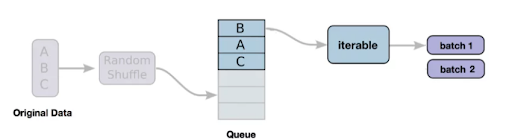

In [49]:
batch_size = 64 # To group each k samples together.

# DataLoaders simplify the job of grouping the samples into batches.
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False)  # no need to shuffle validation data
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)  # no need to shuffle test data

## Train the data in a CNN model

In [50]:
import torch.nn as nn
import torch.nn.functional as F
import torch
import torch.optim as optim

In [51]:
class ArabicSignCNN(nn.Module):
    def __init__(self, num_classes):
        super(ArabicSignCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 12 * 12, 128)
        self.fc2 = nn.Linear(128, num_classes)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # 48x48 → 24x24
        x = self.pool(F.relu(self.conv2(x)))  # 24x24 → 12x12
        x = x.view(-1, 64 * 12 * 12)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

In [52]:

model = ArabicSignCNN(n_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Training loop
epochs = 10

In [53]:
best_val_loss = float('inf')  # For saving the best model

for epoch in range(epochs):
    model.train()
    train_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()

    avg_train_loss = train_loss / len(train_loader)

    # Validation Phase
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = 100 * correct / total

    print(f"Epoch {epoch+1}/{epochs}")
    print(f"Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f} | Val Acc: {val_accuracy:.2f}%")

    # Save best model
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        torch.save(model.state_dict(), "best_arabic_sign_model.pth")
        print("Saved Best Model")

Epoch 1/10
Train Loss: 2.5516 | Val Loss: 1.4168 | Val Acc: 60.37%
Saved Best Model ✅
Epoch 2/10
Train Loss: 1.3269 | Val Loss: 0.8293 | Val Acc: 76.60%
Saved Best Model ✅
Epoch 3/10
Train Loss: 0.9669 | Val Loss: 0.6120 | Val Acc: 83.03%
Saved Best Model ✅
Epoch 4/10
Train Loss: 0.7871 | Val Loss: 0.4905 | Val Acc: 87.02%
Saved Best Model ✅
Epoch 5/10
Train Loss: 0.6699 | Val Loss: 0.4284 | Val Acc: 88.97%
Saved Best Model ✅
Epoch 6/10
Train Loss: 0.5965 | Val Loss: 0.3925 | Val Acc: 89.79%
Saved Best Model ✅
Epoch 7/10
Train Loss: 0.5452 | Val Loss: 0.3594 | Val Acc: 90.54%
Saved Best Model ✅
Epoch 8/10
Train Loss: 0.4990 | Val Loss: 0.3236 | Val Acc: 91.60%
Saved Best Model ✅
Epoch 9/10
Train Loss: 0.4622 | Val Loss: 0.3009 | Val Acc: 92.38%
Saved Best Model ✅
Epoch 10/10
Train Loss: 0.4355 | Val Loss: 0.2950 | Val Acc: 92.43%
Saved Best Model ✅


## Evaluation

In [54]:
correct = 0
total = 0
model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

Test Accuracy: 92.09%


## Save the model

In [55]:
torch.save(model.state_dict(), "arabic_sign_model.pth")